# Coffee Shop Sales

Transaction records for Maven Roasters, a fictitious coffee shop operating out of three NYC locations. Dataset includes the transaction date, timestamp and location, along with product-level details.

# Load Data

In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/ymadigital/Downloads/coffe shop/Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the dataset
df.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Data Cleaning and Preparation

In [2]:
# Check for missing values
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [4]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].dt.date.astype(str) + ' ' + df['transaction_time'].astype(str))

# Ensure numeric fields are the correct type
df['transaction_qty'] = df['transaction_qty'].astype(int)
df['unit_price'] = df['unit_price'].astype(float)

# Now check the data types to confirm the conversion
print(df.dtypes)


transaction_id                   int64
transaction_date        datetime64[ns]
transaction_time                object
transaction_qty                  int64
store_id                         int64
store_location                  object
product_id                       int64
unit_price                     float64
product_category                object
product_type                    object
product_detail                  object
transaction_datetime    datetime64[ns]
dtype: object


In [5]:
# Standardize text data to ensure consistency
df['store_location'] = df['store_location'].str.lower().str.strip()
df['product_category'] = df['product_category'].str.lower().str.strip()
df['product_type'] = df['product_type'].str.lower().str.strip()

In [6]:
# Remove duplicate transactions if any
df.drop_duplicates(subset='transaction_id', inplace=True)

In [7]:
# Example: Calculate total transaction value
df['total_value'] = df['transaction_qty'] * df['unit_price']

In [10]:
# Quick review of the dataset
print(df.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  lower manhattan          32         3.0              coffee   
1         5  lower manhattan          57         3.1                 tea   
2         5  lower manhattan          59         4.5  drinking chocolate   
3         5  lower manhattan          22         2.0              coffee   
4         5  lower manhattan          57         3.1                 tea   

            product_type               product_detail transaction_datetime  \
0  gourmet brewed coffee        

In [11]:
print(df.describe())

       transaction_id  transaction_qty       store_id     product_id  \
count   149116.000000    149116.000000  149116.000000  149116.000000   
mean     74737.371872         1.438276       5.342063      47.918607   
std      43153.600016         0.542509       2.074241      17.930020   
min          1.000000         1.000000       3.000000       1.000000   
25%      37335.750000         1.000000       3.000000      33.000000   
50%      74727.500000         1.000000       5.000000      47.000000   
75%     112094.250000         2.000000       8.000000      60.000000   
max     149456.000000         8.000000       8.000000      87.000000   

          unit_price    total_value  
count  149116.000000  149116.000000  
mean        3.382219       4.686367  
std         2.658723       4.227099  
min         0.800000       0.800000  
25%         2.500000       3.000000  
50%         3.000000       3.750000  
75%         3.750000       6.000000  
max        45.000000     360.000000  


# Exploratory Data Analysis (EDA)

## Trend Analysis

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2390/3032867522.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = df.resample('D').sum()['transaction_qty']  # Or use 'unit_price' for revenue


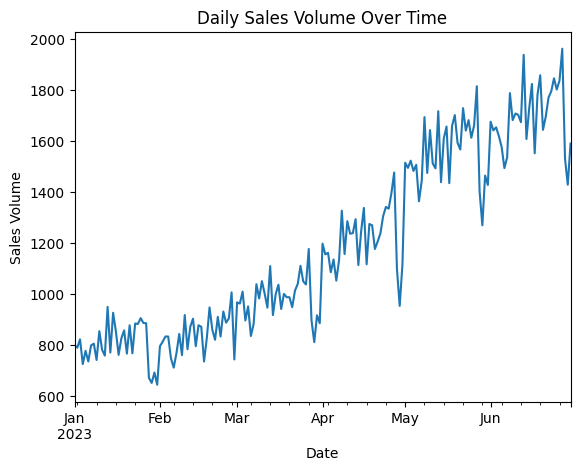

In [12]:
import matplotlib.pyplot as plt

# Aggregate sales data by day/month and plot
df.set_index('transaction_datetime', inplace=True)
daily_sales = df.resample('D').sum()['transaction_qty']  # Or use 'unit_price' for revenue
daily_sales.plot(title='Daily Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.show()

The line chart demonstrates a clear upward trend in daily sales volume over time from January to June 2023. The increasing trend suggests growing business, seasonal factors, or successful marketing efforts. The business should investigate what is driving this growth and consider how to sustain or enhance it. Additionally, understanding the dips and peaks could provide insights into daily or weekly sales patterns, customer behavior, and the effectiveness of promotions or other business strategies.

## Analysis by Day of the Week

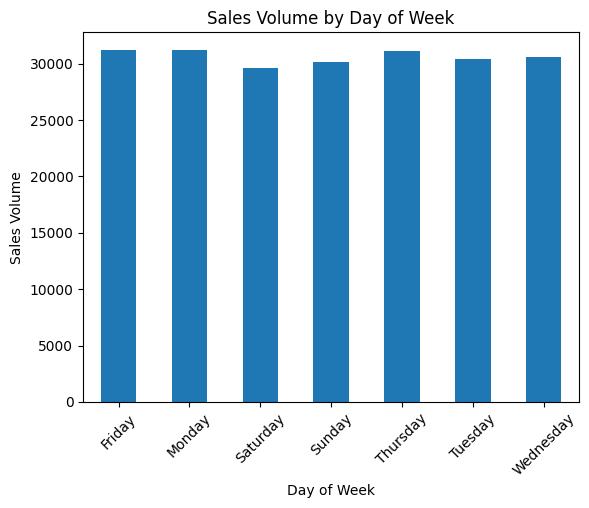

In [13]:
# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Aggregate sales by day of the week
weekly_sales = df.groupby('day_of_week')['transaction_qty'].sum()
weekly_sales.plot(kind='bar', title='Sales Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.show()

The third bar chart shows the sales volume by day of the week, indicating a fairly even distribution with slight variations. Friday appears to be the busiest day, followed closely by Monday and Saturday, which could be due to people treating themselves at the start of the weekend or as a reward after the workweek. The business could capitalize on this by introducing special Friday deals or promotions to further increase sales.

## Product Performance Analysis

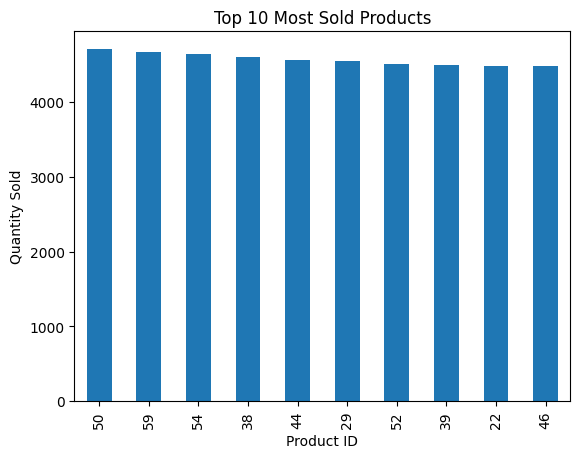

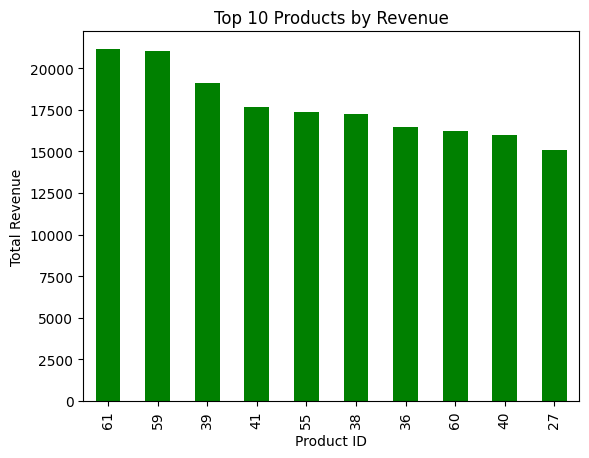

In [14]:
# Most sold products
top_products = df.groupby('product_id')['transaction_qty'].sum().sort_values(ascending=False)
top_products.head(10).plot(kind='bar', title='Top 10 Most Sold Products')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.show()

# Products driving most revenue
df['revenue'] = df['transaction_qty'] * df['unit_price']
top_revenue_products = df.groupby('product_id')['revenue'].sum().sort_values(ascending=False)
top_revenue_products.head(10).plot(kind='bar', color='green', title='Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.show()

**Top 10 Products by Revenue**

This bar chart displays the top 10 products by revenue. It's clear that product IDs 61 and 59 are leading in terms of revenue, indicating they are either higher-priced items, more frequently sold, or a combination of both. Products 39, 41, and 55 follow closely, suggesting they are also significant contributors to the overall revenue. A potential strategy for the business could be to focus on marketing these top-performing products even more or to explore cross-selling opportunities with them.

**Top 10 Most Sold Products**

The second bar chart illustrates the top 10 products by quantity sold. Product IDs 50, 59, and 54 are the most sold, indicating high popularity or demand. It's interesting to note that while product 59 is both a top revenue generator and a top seller, product 61, which was the top revenue generator, is not on this list. This suggests that product 61 may be a high-priced item sold less frequently. The business might consider strategies to increase the sales volume of popular products or to upsell/cross-sell with them.

## Analysis by Product Type

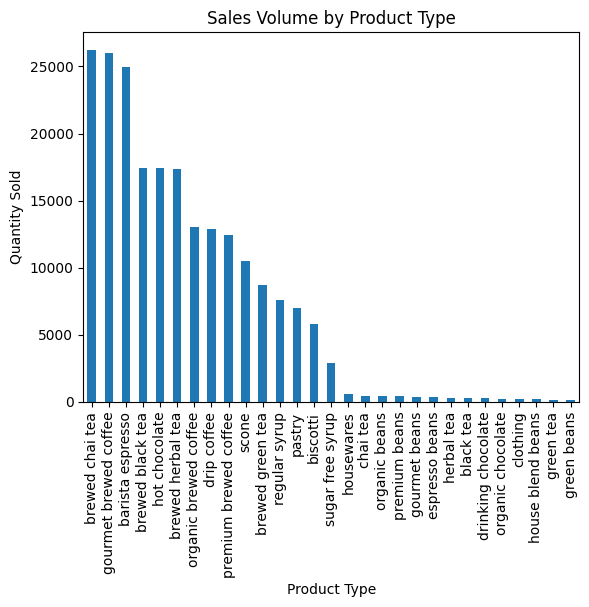

In [17]:
# Aggregate sales by product type
sales_by_product_type = df.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False)

# Visualize the sales by product type
sales_by_product_type.plot(kind='bar', title='Sales Volume by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.show()

The bar chart for sales volume by product type shows 'brewed chai tea' and 'brewed espresso' as the leading products in terms of quantity sold. This indicates a strong customer preference for these beverages. The gradual decline in quantity sold for other product types suggests a wide but varying customer interest in the broader product range. Maven Roasters might leverage the popularity of these top-selling items to introduce customers to other offerings or create new products that complement the bestsellers.

## Analysis by Product Category

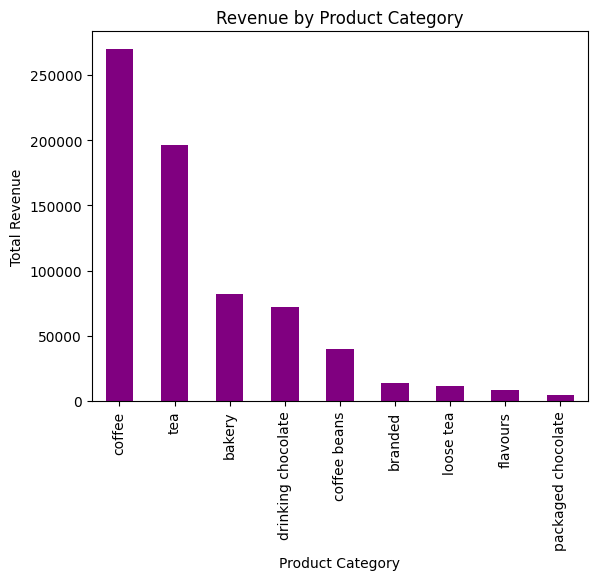

In [18]:
# Aggregate revenue by product category
revenue_by_product_category = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

# Visualize the revenue by product category
revenue_by_product_category.plot(kind='bar', color='purple', title='Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

In the bar chart of revenue by product category, we see that 'coffee' is the most significant revenue generator, followed by 'tea' and 'bakery'. This suggests that the core offerings of the coffee shop are indeed its best revenue drivers. The sharp drop-off after 'tea' could indicate a potential area for growth or a need to reassess the variety and marketing of other product categories. The business might consider bundling less popular items with top sellers to boost sales or re-evaluating the product mix to align with customer preferences.

## Analysis by Store Location

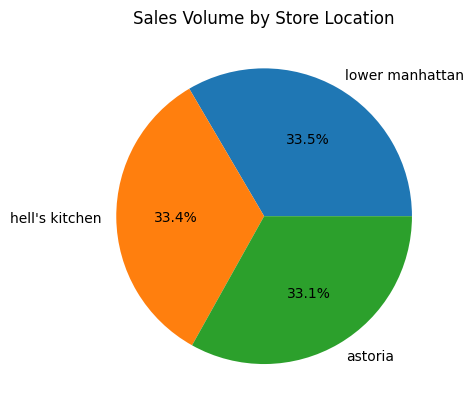

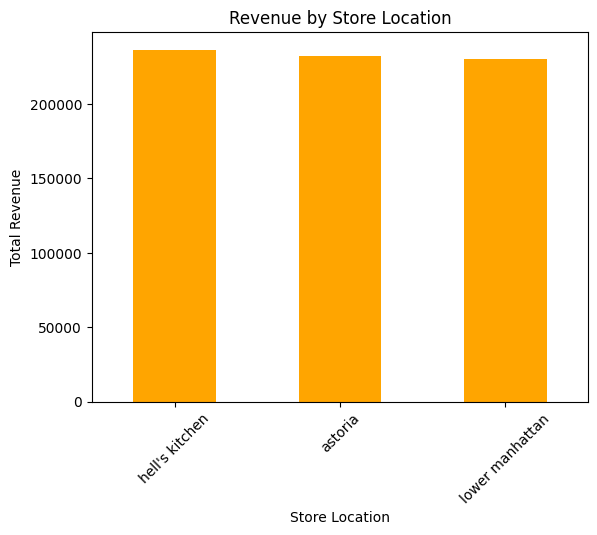

In [19]:
# Aggregate sales by store location
sales_by_store_location = df.groupby('store_location')['transaction_qty'].sum().sort_values(ascending=False)

# Visualize the sales by store location
sales_by_store_location.plot(kind='pie', autopct='%1.1f%%', title='Sales Volume by Store Location')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

# For revenue by store location
revenue_by_store_location = df.groupby('store_location')['revenue'].sum().sort_values(ascending=False)
revenue_by_store_location.plot(kind='bar', color='orange', title='Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## Time Series Analysis for Seasonality and Trends

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2390/450129521.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df.resample('M').sum()['transaction_qty']
/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2390/450129521.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = df.resample('W').sum()['transaction_qty']


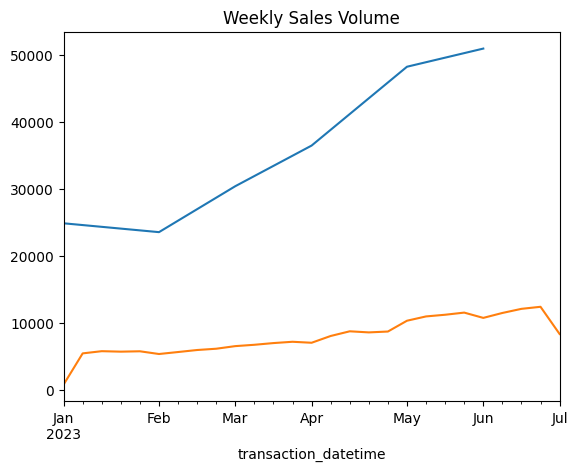

In [20]:
# Assuming df is your DataFrame and it has a datetime index
monthly_sales = df.resample('M').sum()['transaction_qty']
monthly_sales.plot(title='Monthly Sales Volume')

# You might also look at other frequencies
weekly_sales = df.resample('W').sum()['transaction_qty']
weekly_sales.plot(title='Weekly Sales Volume')

# For daily patterns, you could group by hour if you have hourly data
if 'transaction_hour' in df.columns:
    hourly_sales = df.groupby(df['transaction_hour']).sum()['transaction_qty']
    hourly_sales.plot(title='Hourly Sales Volume')

**Sales Trends Over Time:**

There's a significant upward trend in sales volume over the first half of 2023, suggesting positive business growth.
Some categories or locations, represented by the orange line in one of the charts, are not experiencing the same growth and require further investigation to understand the stagnation or decline.

**Weekly and Daily Patterns:**

Sales volume shows variability on a weekly basis, with certain days of the week performing better than others, indicating potential patterns in consumer behavior.
The data suggests that Friday is typically the busiest day, which could be capitalized on with targeted promotions or special events.

**Product Performance:**

Top revenue-generating products are identified, with coffee and tea leading the sales, suggesting a strong market preference for these core products.

Certain products are very popular in terms of quantity sold but may not necessarily be the top revenue drivers, indicating a difference in pricing or margin.

**Store Performance:**
Sales and revenue are fairly evenly distributed across the three store locations, indicating consistent performance across different areas.

Lower Manhattan shows a slight edge in sales volume, which might be attributed to higher foot traffic or operational efficiencies.

### **Conclusions:**
Maven Roasters is experiencing growth, but some areas or product categories are not performing as well as others. Identifying and understanding the reasons behind these discrepancies will be crucial.

The popularity of coffee and tea products could be leveraged to promote less popular items or to introduce new products.

The business could benefit from targeted marketing strategies to boost sales on slower days and in underperforming categories or locations.

Operational strategies, such as staffing and inventory management, should align with the observed sales patterns to maximize efficiency and customer satisfaction.





[Hafida Belayd](https://www.linkedin.com/in/hafida-belayd/)
